## Etapa: 05. Modelagem

#### Código criado por: Eduardo Arthur Bitencourt  | Data: 02/08/2023
##### Github: https://github.com/bitencourt-eduardo  | Linkedin: https://www.linkedin.com/in/bitencourt-eduardo/

In [39]:
#!pip install matplotlib
#!pip install imbalanced-learn
#!pip install xgboost

In [40]:
#Importar Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score




#### Carregando arquivos FieldPRO

Sensor_FieldPRO, dados transmitidos pelo sensor

In [41]:
# Carregar arquivo de dados transmitidos pelo sensor
diretorio = '../datasets/{name_file}'

df_oversampling = pd.read_csv(diretorio.format(name_file='df_oversampling.csv'), sep=';', decimal='.')
df_undersampling = pd.read_csv(diretorio.format(name_file='df_undersampling.csv'), sep=';', decimal='.')
df_bsmote = pd.read_csv(diretorio.format(name_file='df_bsmote.csv'), sep=';', decimal='.')

df_normalized = pd.read_csv(diretorio.format(name_file='df_normalized.csv'), sep=';', decimal='.')

df_oversampling.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39690 entries, 0 to 39689
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   air_humidity_100   39690 non-null  float64
 1   atm_pressure_main  39690 non-null  float64
 2   num_of_resets      39690 non-null  float64
 3   piezo_charge       39690 non-null  float64
 4   piezo_temperature  39690 non-null  float64
 5   chuva              39690 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.8 MB


In [42]:
df_undersampling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   air_humidity_100   27 non-null     float64
 1   atm_pressure_main  27 non-null     float64
 2   num_of_resets      27 non-null     float64
 3   piezo_charge       27 non-null     float64
 4   piezo_temperature  27 non-null     float64
 5   chuva              27 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 1.4 KB


In [43]:
df_bsmote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   air_humidity_100   2981 non-null   float64
 1   atm_pressure_main  2981 non-null   float64
 2   num_of_resets      2981 non-null   float64
 3   piezo_charge       2981 non-null   float64
 4   piezo_temperature  2981 non-null   float64
 5   chuva              2981 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 139.9 KB


_____________________________________________________________________________________________________________________________

# REGRESSÃO LINEAR

* REGRESSÃO LINEAR OVERSAMPLED

In [44]:
# Selecionando as variáveis independentes e a variável alvo (chuva)
data = df_oversampling

X = data.drop(columns=['chuva'])
y = data['chuva']

# Dividindo os dados em conjunto de treinamento e conjunto de teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
reg_model = LinearRegression()

# Treinando o modelo com o conjunto de treinamento
reg_model.fit(X_train, y_train)

# Realizando as previsões no conjunto de teste
y_pred = reg_model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro quadrático médio (MSE):", mse)
print("Coeficiente de determinação (R²):", r2)

Erro quadrático médio (MSE): 486.19894885731475
Coeficiente de determinação (R²): 0.16459659260082793


*  REGRESSÃO LINEAR  UNDERSAMPLED

In [45]:
# Selecionando as variáveis independentes e a variável alvo (chuva)
data = df_undersampling
X = data.drop(columns=['chuva'])
y = data['chuva']

# Dividindo os dados em conjunto de treinamento e conjunto de teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
reg_model = LinearRegression()

# Treinando o modelo com o conjunto de treinamento
reg_model.fit(X_train, y_train)

# Realizando as previsões no conjunto de teste
y_pred = reg_model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro quadrático médio (MSE):", mse)
print("Coeficiente de determinação (R²):", r2)

Erro quadrático médio (MSE): 2987.563820181223
Coeficiente de determinação (R²): -24.199694828145272


*  REGRESSÃO LINEAR  BOARD SMOTE

In [46]:
# Selecionando as variáveis independentes e a variável alvo (chuva)
data = df_bsmote
X = data.drop(columns=['chuva'])
y = data['chuva']

# Dividindo os dados em conjunto de treinamento e conjunto de teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
reg_model = LinearRegression()

# Treinando o modelo com o conjunto de treinamento
reg_model.fit(X_train, y_train)

# Realizando as previsões no conjunto de teste
y_pred = reg_model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro quadrático médio (MSE):", mse)
print("Coeficiente de determinação (R²):", r2)

Erro quadrático médio (MSE): 2.414566100104671
Coeficiente de determinação (R²): 0.07927995304009128


*  REGRESSÃO LINEAR DADOS NORMALIZADOS E NAO BALANCEADOS

In [47]:
# Selecionando as variáveis independentes e a variável alvo (chuva)
data = df_normalized
X = data.drop(columns=['chuva'])
y = data['chuva']

# Dividindo os dados em conjunto de treinamento e conjunto de teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
reg_model = LinearRegression()

# Treinando o modelo com o conjunto de treinamento
reg_model.fit(X_train, y_train)

# Realizando as previsões no conjunto de teste
y_pred = reg_model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro quadrático médio (MSE):", mse)
print("Coeficiente de determinação (R²):", r2)

Erro quadrático médio (MSE): 0.0008055823084388694
Coeficiente de determinação (R²): 0.02610635279519069


Observado:
* Regressão Linear para DataSets balanceamento Invalidados
* Modelo de Regressão Linear sem Balanceamento acerta mais, devido a alta assertividade de não chuva. O que significa que o modelo explica apenas uma pequena proporção da variabilidade

# RANDO FOREST

* RANDOM OVERSAMPLING

In [92]:
# Selecionando as colunas de features (variáveis independentes) e a variável alvo (chuva)
#data = df_oversampling[[ 'atm_pressure_main','num_of_resets','piezo_charge','piezo_temperature','chuva']]

#data = df_oversampling[['air_humidity_100', 'atm_pressure_main','piezo_charge','piezo_temperature','chuva']]
data = df_oversampling[['air_humidity_100','num_of_resets', 'atm_pressure_main','piezo_charge','chuva']]


X = data.drop(columns=['chuva'])
y = data['chuva']

# Dividindo os dados em conjunto de treinamento e conjunto de teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo com o conjunto de treinamento
rf_model.fit(X_train, y_train)

# Realizando as previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro quadrático médio (MSE):", mse)
print("Coeficiente de determinação (R²):", r2)

Erro quadrático médio (MSE): 1.2300388259007307
Coeficiente de determinação (R²): 0.997886505865951


In [93]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


# Selecionando as colunas de features (variáveis independentes) e a variável alvo (chuva)
X = data.drop(columns=['chuva'])
y = data['chuva']

# Criando o modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Realizando a validação cruzada com 5 folds
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertendo os scores de MSE negativos para positivos
cv_scores = -cv_scores

# Calculando a média e desvio padrão dos scores
mean_mse = cv_scores.mean()
std_mse = cv_scores.std()

print("Média do MSE:", mean_mse)
print("Desvio padrão do MSE:", std_mse)


Média do MSE: 216.60218711766188
Desvio padrão do MSE: 182.42571527323489


* RANDOM FOREST UNDERSAMPLING

In [50]:
# Selecionando as colunas de features (variáveis independentes) e a variável alvo (chuva)
data = df_undersampling

X = data.drop(columns=['chuva'])
y = data['chuva']

# Dividindo os dados em conjunto de treinamento e conjunto de teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo com o conjunto de treinamento
rf_model.fit(X_train, y_train)

# Realizando as previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro quadrático médio (MSE):", mse)
print("Coeficiente de determinação (R²):", r2)

Erro quadrático médio (MSE): 690.24735
Coeficiente de determinação (R²): -4.822142596063729


* RANDOM FOREST BORD SMOTE

In [51]:
# Selecionando as colunas de features (variáveis independentes) e a variável alvo (chuva)
data = df_bsmote

X = data.drop(columns=['chuva'])
y = data['chuva']

# Dividindo os dados em conjunto de treinamento e conjunto de teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo com o conjunto de treinamento
rf_model.fit(X_train, y_train)

# Realizando as previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro quadrático médio (MSE):", mse)
print("Coeficiente de determinação (R²):", r2)

Erro quadrático médio (MSE): 2.1405901172529314
Coeficiente de determinação (R²): 0.183752214033984


* RANDOM FOREST NORMALIZED SEM BALANCEAMENTO

In [52]:
# Selecionando as colunas de features (variáveis independentes) e a variável alvo (chuva)
data = df_normalized

X = data.drop(columns=['chuva'])
y = data['chuva']

# Dividindo os dados em conjunto de treinamento e conjunto de teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo com o conjunto de treinamento
rf_model.fit(X_train, y_train)

# Realizando as previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro quadrático médio (MSE):", mse)
print("Coeficiente de determinação (R²):", r2)

Erro quadrático médio (MSE): 0.0023699798799301152
Coeficiente de determinação (R²): -1.8651427978104658


Observado:
* Bom desempenho para Random Forest com OverSampling

# XGBOST

In [53]:
import xgboost as xgb

* XGBOOST OVERSAMPLING

In [54]:
# Selecionando as colunas de features (variáveis independentes) e a variável alvo (chuva)
data = df_oversampling

X = data.drop(columns=['chuva'])
y = data['chuva']

# Dividindo os dados em conjunto de treinamento e conjunto de teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)

# Treinando o modelo com o conjunto de treinamento
xgb_model.fit(X_train, y_train)

# Realizando as previsões no conjunto de teste
y_pred = xgb_model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro quadrático médio (MSE):", mse)
print("Coeficiente de determinação (R²):", r2)

Erro quadrático médio (MSE): 0.2620537724778621
Coeficiente de determinação (R²): 0.9995497303830781


* XGBOOST UNDERSAMPLING

In [55]:
# Selecionando as colunas de features (variáveis independentes) e a variável alvo (chuva)
data = df_undersampling

X = data.drop(columns=['chuva'])
y = data['chuva']

# Dividindo os dados em conjunto de treinamento e conjunto de teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)

# Treinando o modelo com o conjunto de treinamento
xgb_model.fit(X_train, y_train)

# Realizando as previsões no conjunto de teste
y_pred = xgb_model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro quadrático médio (MSE):", mse)
print("Coeficiente de determinação (R²):", r2)

Erro quadrático médio (MSE): 257.8603844943
Coeficiente de determinação (R²): -1.175017301264011


* XGBOOST BORD SMOTE

In [56]:
# Selecionando as colunas de features (variáveis independentes) e a variável alvo (chuva)
data = df_bsmote

X = data.drop(columns=['chuva'])
y = data['chuva']

# Dividindo os dados em conjunto de treinamento e conjunto de teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)

# Treinando o modelo com o conjunto de treinamento
xgb_model.fit(X_train, y_train)

# Realizando as previsões no conjunto de teste
y_pred = xgb_model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro quadrático médio (MSE):", mse)
print("Coeficiente de determinação (R²):", r2)

Erro quadrático médio (MSE): 1.7288307899760458
Coeficiente de determinação (R²): 0.3407638887734413


* XGBOOST DADOS NORMALIZADOS E NÃO BALANCEADOS

In [57]:
# Selecionando as colunas de features (variáveis independentes) e a variável alvo (chuva)
data = df_normalized

X = data.drop(columns=['chuva'])
y = data['chuva']

# Dividindo os dados em conjunto de treinamento e conjunto de teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)

# Treinando o modelo com o conjunto de treinamento
xgb_model.fit(X_train, y_train)

# Realizando as previsões no conjunto de teste
y_pred = xgb_model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro quadrático médio (MSE):", mse)
print("Coeficiente de determinação (R²):", r2)

Erro quadrático médio (MSE): 0.0036813334233945414
Coeficiente de determinação (R²): -3.450479108999372


Observado:
* Bom desempenho para XGBOOST com OverSampling

# CROSVALIDATION

In [58]:
from sklearn.model_selection import cross_val_score

In [128]:
# Selecionando as colunas de features (variáveis independentes) e a variável alvo (chuva)

data = df_oversampling[[ 'air_humidity_100','atm_pressure_main','piezo_charge','piezo_temperature','chuva']]

#data = df_oversampling[['num_of_resets','piezo_charge','piezo_temperature','chuva']]

X = data.drop(columns=['chuva'])
y = data['chuva']

# Dividindo os dados em conjunto de treinamento e conjunto de teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)

# Treinando o modelo com o conjunto de treinamento
xgb_model.fit(X_train, y_train)

# Realizando as previsões no conjunto de teste
y_pred = xgb_model.predict(X_test)


# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro quadrático médio (MSE):", mse)
print("Coeficiente de determinação (R²):", r2)

# Realizando a validação cruzada com 5 folds
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertendo os scores de MSE negativos para positivos
cv_scores = -cv_scores

# Calculando a média e desvio padrão dos scores
mean_mse = cv_scores.mean()
std_mse = cv_scores.std()

print("Média do MSE:", mean_mse)
print("Desvio padrão do MSE:", std_mse)

Erro quadrático médio (MSE): 0.2300775893696224
Coeficiente de determinação (R²): 0.9996046729377401
Média do MSE: 76.53309249502111
Desvio padrão do MSE: 150.53366129122978


In [157]:
# Plotagem dos dados de chuva reais e valores preditos

data = df_normalized[[ 'air_humidity_100','atm_pressure_main','piezo_charge','piezo_temperature','chuva']]

#data = df_oversampling[['num_of_resets','piezo_charge','piezo_temperature','chuva']]

X = data.drop(columns=["chuva"])
y = data["chuva"]

# Discretizar a variável "chuva" em 27 classes
num_classes_chuva = 100
y_discretized = pd.cut(y, bins=num_classes_chuva, labels=False)


# Criar um novo DataFrame com os dados resampleados e a variável "chuva" convertida de volta para contínua
df_resample = pd.DataFrame(X, columns=X.columns)
df_resample["chuva"] = y_discretized


# Dividindo os dados em conjunto de treinamento e conjunto de teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)


# Realizando as previsões no conjunto de teste
y_norm = xgb_model.predict(X)


Text(0.5, 1.0, 'Carga do Acumulador & Chuva')

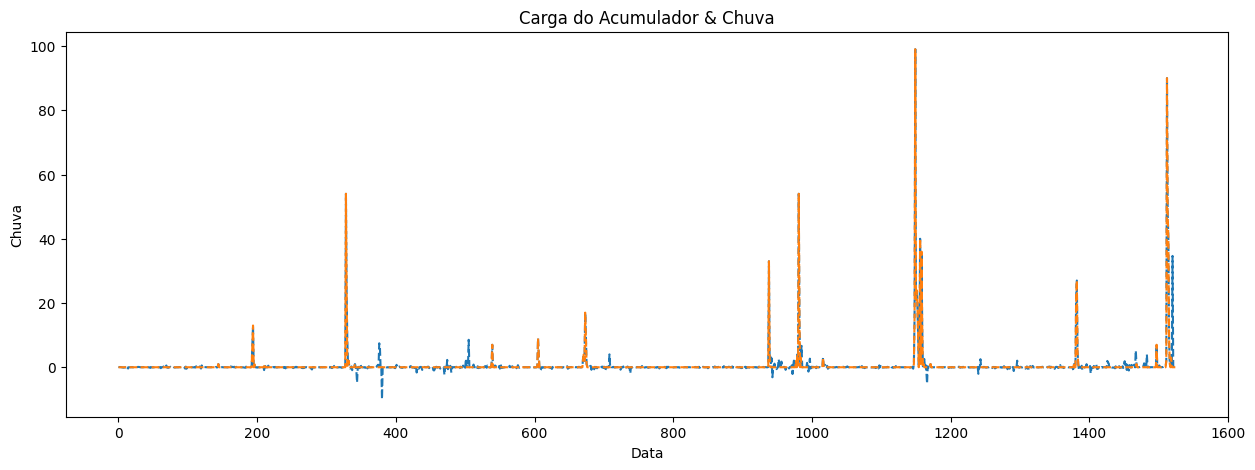

In [171]:
import seaborn as sns


plt.figure(figsize=(15, 5))
plt.plot(y_norm, label='Chuva Discretizada', linestyle='--', marker='')
plt.plot(df_resample.chuva, label='Chuva Preditos', linestyle='--', marker='')
plt.xlabel('Data')
plt.ylabel('Chuva')
plt.title('Carga do Acumulador & Chuva')

# Conclusão:

Após otimização o modelo XGBoost com as colunas [ 'air_humidity_100','atm_pressure_main','piezo_charge','piezo_temperature','chuva'] e abase de dados Oversampled obteve os melhores desempenhos

* Erro quadrático médio (MSE): 0.2300775893696224
* Coeficiente de determinação (R²): 0.9996046729377401
* Média do MSE: 76.53309249502111
* Desvio padrão do MSE: 150.53366129122978

